In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('WHO/ledata.csv')
df = df.dropna()

del df['Country']
del df['Year']
del df['Status']

y = df['Life expectancy '].to_numpy()

del df['Life expectancy ']

A = df.to_numpy()

n_train = 1349

A_train = A[:1349:]
y_train = y[:1349]

A_test = A[1349::]
y_test = y[1349:]

print(A_train.shape)

## data normalization 

mA = A_train.mean(axis=0)
sA = A_train.std(axis=0)


A_train = (A_train-mA)/sA
A_test = (A_test-mA)/sA

m = y_train.mean()
y_train = y_train-m
y_test = y_test-m

(1349, 18)


In [3]:
def score(X_n,A,y): #return the coeff of determination
    y_pred= A@X_n
    return 1-(((y_pred-y)**2).sum())/(((y-y.mean())**2).sum())

def loss(X_n,A,y):
    return np.mean(1/2*np.square(A@X_n-y))

In [8]:
### Gradient descent

def grad_desc_ridge(A,y,eps=1e-2,lr = None,lamb= 0,verbose=0,itemax=170):
    X = np.zeros(A.shape[1])
    grad = np.array([1000]*A.shape[1])
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))+2*lamb*X
        X = X - lr*grad
        l_loss.append((1/2*(y_pred-y)**2+lamb*np.sum(np.square(X))).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss

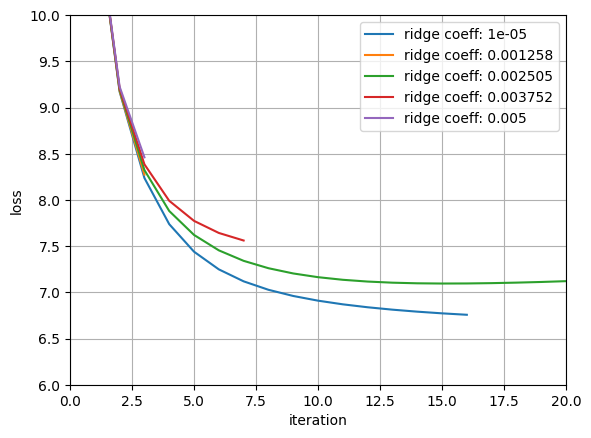

In [9]:
L_loss =[]
l_i = np.linspace(0.00001,0.005,5)
for i in l_i:
    X_n,l_loss = grad_desc_ridge(A_train,y_train,eps=2,lamb=i)
    L_loss.append(l_loss)


plt.figure(1)
for k,l_loss in enumerate(L_loss):
    plt.plot(l_loss,label='ridge coeff: {}'.format(round(l_i[k],6)))
plt.xlabel('iteration')
plt.ylabel('loss')
plt.xlim(0,20)
plt.ylim(6,10)
plt.grid()
plt.legend()
plt.show()

In [5]:
def grad_desc_lasso(A,y,eps=1e-2,lr = None,lamb= 0,verbose=0,itemax=170):
    X = np.zeros(A.shape[1])
    grad = np.array([1000]*A.shape[1])
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))+2*lamb*np.array([1]*len(X)).T
        X = X - lr*grad 
        l_loss.append((1/2*(y_pred-y)**2+ lamb*np.sum(np.abs(X))).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss

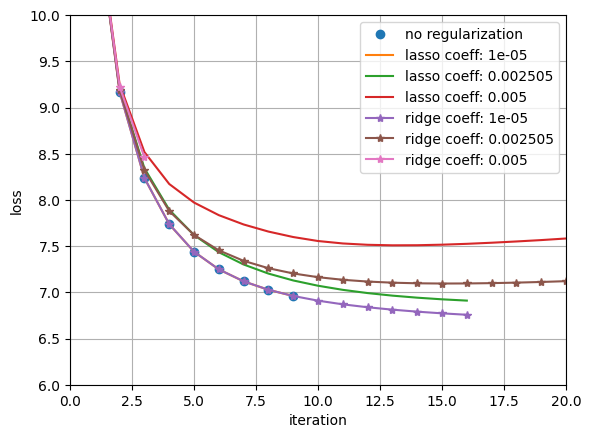

In [39]:
L_loss =[]
l_i = np.linspace(0.000001,0.005,3)
for i in l_i:
    X_n,l_loss = grad_desc_lasso(A_train,y_train,eps=2,lamb=i)
    L_loss.append(l_loss)

L_loss2 =[]
l_i = np.linspace(0.00001,0.005,3)
for i in l_i:
    X_n,l_loss = grad_desc_ridge(A_train,y_train,eps=2,lamb=i)
    L_loss2.append(l_loss)


X_n,l_loss = grad_desc_ridge(A_train,y_train,eps=2,lamb=0)

plt.figure(1)
plt.plot(l_loss,'o',label='no regularization')
for k,l_loss in enumerate(L_loss):
    plt.plot(l_loss,label='lasso coeff: {}'.format(round(l_i[k],6)))
for k,l_loss in enumerate(L_loss2):
    plt.plot(l_loss,'-*',label='ridge coeff: {}'.format(round(l_i[k],6)))
plt.xlabel('iteration')
plt.ylabel('loss')
plt.xlim(0,20)
plt.ylim(6,10)
plt.grid()
plt.legend()
plt.show()